In [ ]:
import pickle
from datetime import date

import matplotlib.pyplot as plt
import numpy as np
import polars as pl

In [68]:
## data ##
data = pl.read_parquet("../output/flu_state/data.parquet")

In [69]:
len(data["season"].unique()) + len(data["geography"].unique())

64

In [70]:
with open("../output/flu_state/fits/fit_2022-04-01.pkl", "rb") as f:
    fits = pickle.load(f)

fits

{('LPLModel',
  datetime.date(2022, 4, 1)): <iup.models.LPLModel at 0x7d13407bbb10>}

In [62]:
fit = fits[("LPLModel", date(2022, 4, 1))]
samples = fit.mcmc.get_samples()

/home/ab32/github/cfa-immunization-uptake-projection/.venv/lib/python3.13/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (137) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'K'}>, <Axes: title={'center': 'd'}>,
        <Axes: title={'center': 'muA'}>, <Axes: title={'center': 'muM'}>],
       [<Axes: title={'center': 'sigmaA\n0'}>,
        <Axes: title={'center': 'sigmaA\n1'}>,
        <Axes: title={'center': 'sigmaM\n0'}>,
        <Axes: title={'center': 'sigmaM\n1'}>],
       [<Axes: title={'center': 'tau'}>,
        <Axes: title={'center': 'zA\n0'}>,
        <Axes: title={'center': 'zA\n1'}>,
        <Axes: title={'center': 'zA\n2'}>],
       [<Axes: title={'center': 'zA\n3'}>,
        <Axes: title={'center': 'zA\n4'}>,
        <Axes: title={'center': 'zA\n5'}>,
        <Axes: title={'center': 'zA\n6'}>],
       [<Axes: title={'center': 'zA\n7'}>,
        <Axes: title={'center': 'zA\n8'}>,
        <Axes: title={'center': 'zA\n9'}>,
        <Axes: title={'center': 'zA\n10'}>],
       [<Axes: title={'center': 'zA\n11'}>,
        <Axes: title={'center': 'zA\n12'}>,
        <Axes: title={'center': 'zA\n13'}>,
        <Axes: t

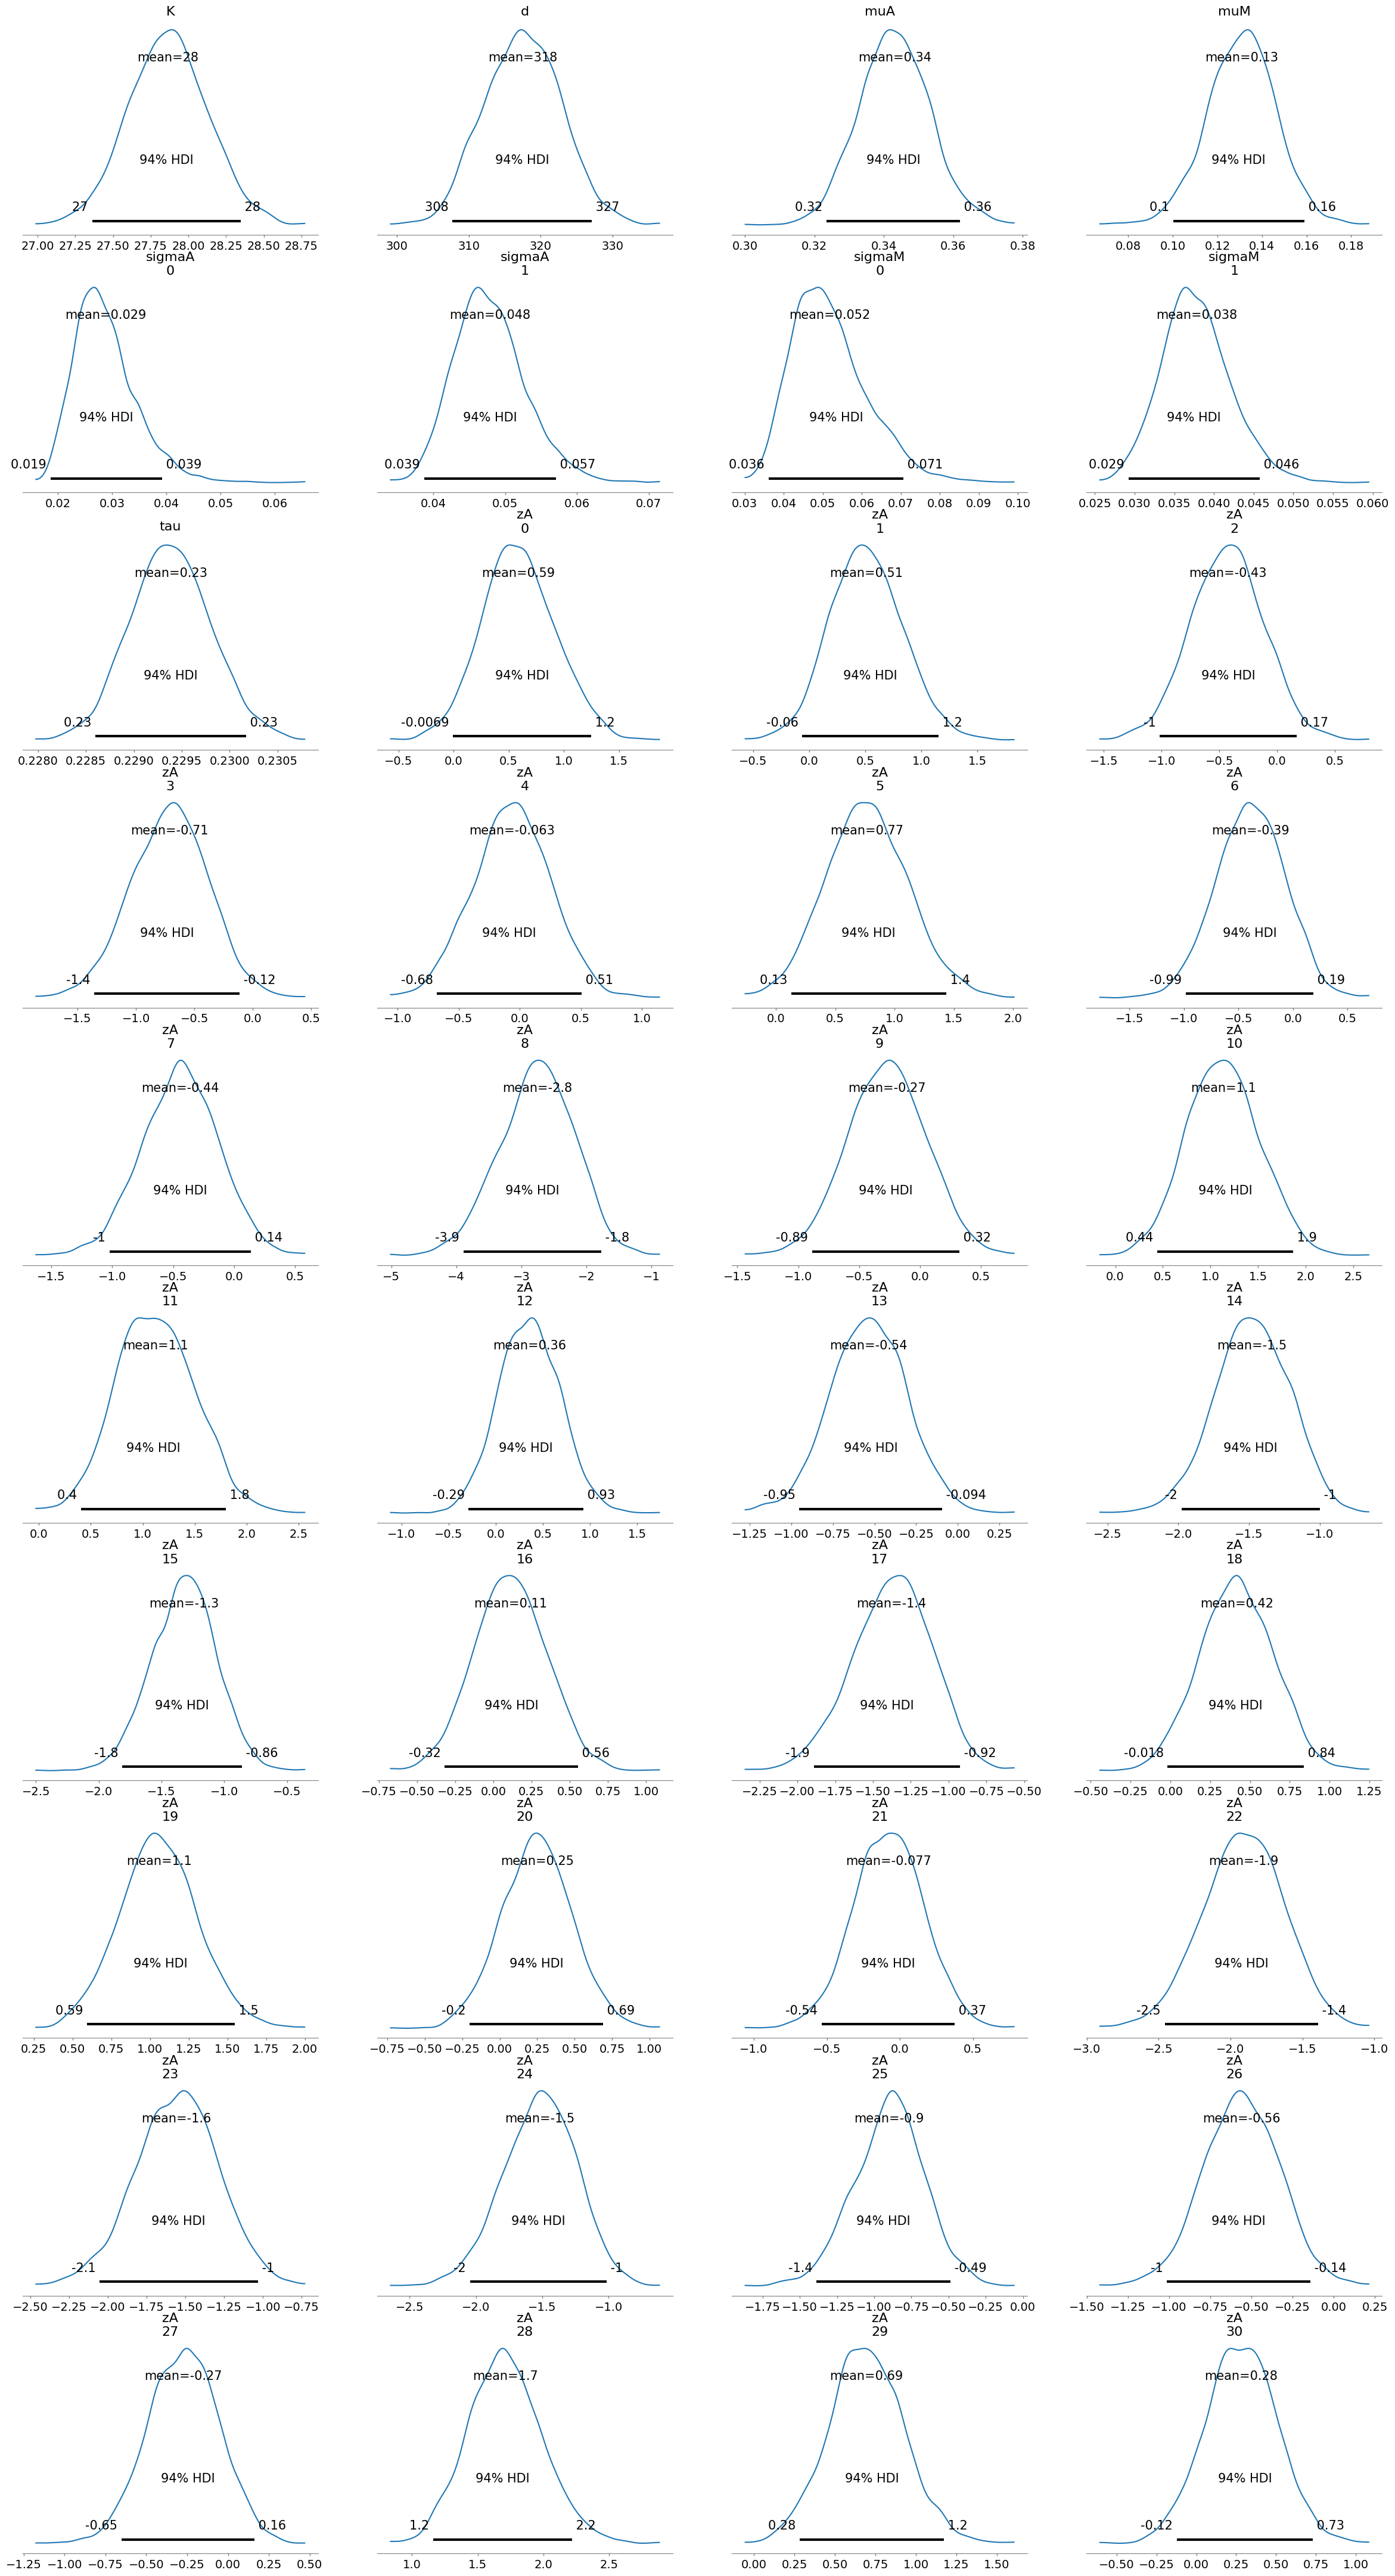

In [ ]:
# posterior looks fine
# az.plot_posterior(az.from_numpyro(fit.mcmc))

In [63]:
groups = ["season", "geography"]
group_levels = [len(data[group].unique()) for group in groups]
group_names = (
    ["mu"]
    + [f"sigma_{group}" for group in groups]
    + [
        f"dev_{group}_{i}"
        for group, index in zip(groups, group_levels)
        for i in range(index)
    ]
)

samples_A = np.concatenate(
    [np.expand_dims(samples["muA"], 1), samples["sigmaA"], samples["zA"]], 1
)
samples_M = np.concatenate(
    [np.expand_dims(samples["muM"], 1), samples["sigmaM"], samples["zM"]], 1
)

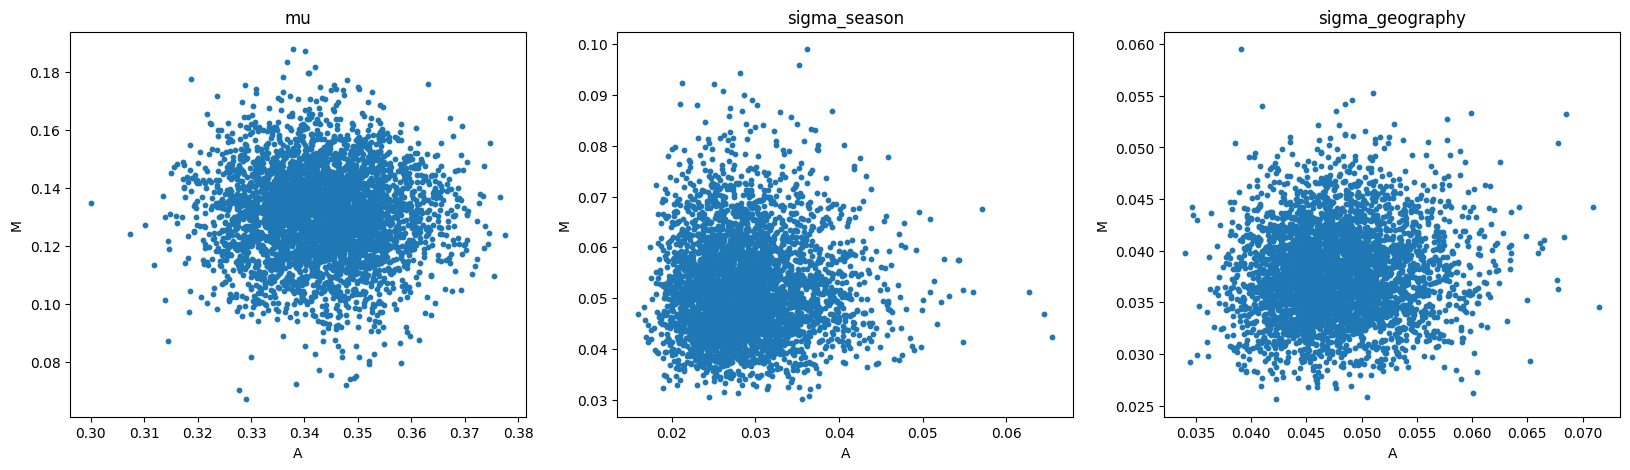

In [75]:
## population effect ##
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, ax in enumerate(axes.flat[0:3]):
    ax.scatter(samples_A[:, i], samples_M[:, i], s=10)
    ax.set_title(group_names[i])
    ax.set_xlabel("A")
    ax.set_ylabel("M")

In [77]:
a = [1, 2, 3]
a[1:]

[2, 3]

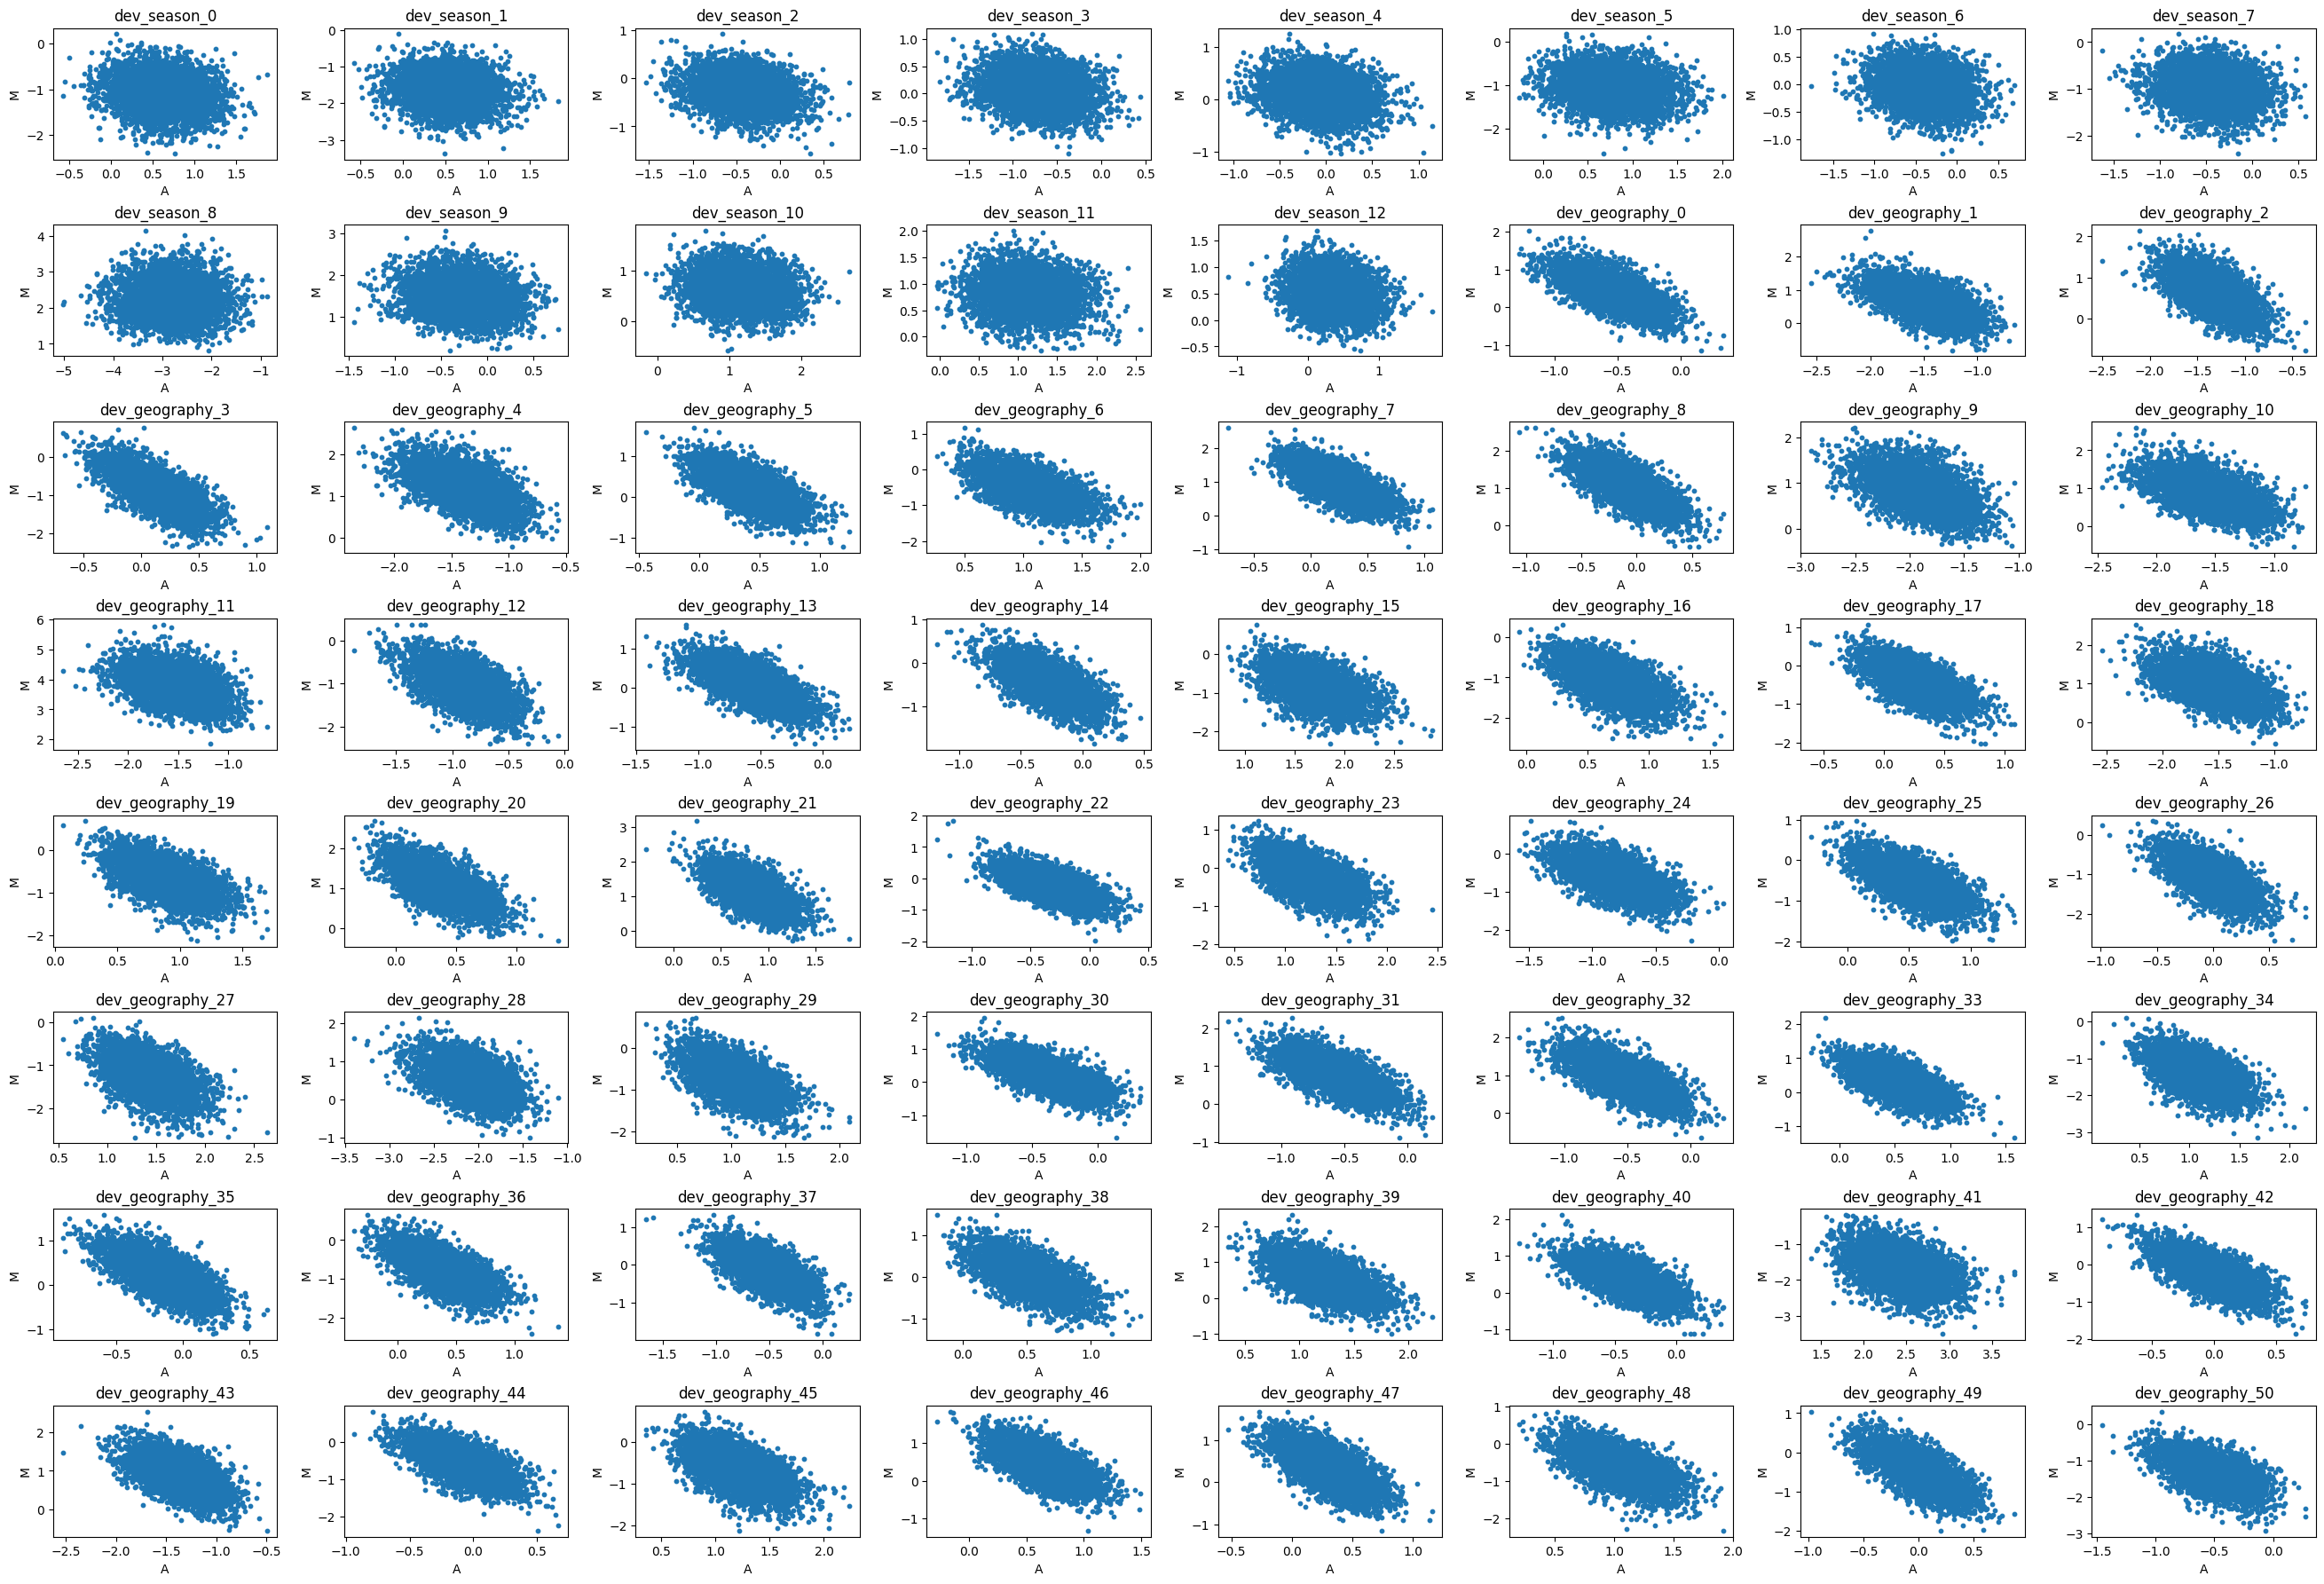

In [78]:
## effect from state and season ##
fig, axes = plt.subplots(8, 8, figsize=(30, 20))

for i, ax in enumerate(axes.flat):
    ax.scatter(samples_A[:, i + 3], samples_M[:, i + 3], s=10)
    ax.set_title(group_names[i + 3])
    ax.set_xlabel("A")
    ax.set_ylabel("M")

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.3, hspace=0.5)